# 10701 HW3: Implementing Neural Network
In this part, you will implement the basic layers and the backpropagation algorithm for a neural network. We are not considering convolution layers or any fancy techniques like batch normalization. In the end, you will train a multi-layered, fully connected neural network to recognize digits from handwritten images, specifically speaking, the [MNIST dataset](http://yann.lecun.com/exdb/mnist/), with validation error rate less than 4%.

![MNIST_example](https://drive.google.com/uc?export=view&id=1q4Kjt_OhiC1TMLq_pDtmwukxvKJGKBs5)

This homework is beneficial in that you will have a solid understanding of the mathematical derivation and practical programming of simple neural networks, which means that you are **NOT** allowed to use any 3rd party external libraries (PyTorch, TensorFlow etc.) other than Numpy for linear algebra and Matplotlib for plotting.

You are recommended to go over related lectures before starting. If you are ready, let's get started. 

---

Note: There is always a **TODO** sign where you should add your code. Please do not modify anywhere else. \\
Note: To help you debug, we have provided you with the sample output of the first 10 epochs of training and the resulting plot after 100 epochs of training. When grading, we will run your code to check if it produces the correct output.



## Basic layers

As you learned from the lecture, neural networks are composed of basic layers. Let's first take a look at the base class of layers. 

Each layer basically contains a *`forward`* and a *`backward`* member function. The *`forward`* function takes an input, makes some modifications and returns an output. It may also keep some records in its internal states necessary for the later backpropagation. The *`backward`* function takes a *delta* from the next layer and a *learning rate*, which are used to calculate the delta as to the last layer and update its own parameters. All the basic layers inherit from the *`Layer`* class and should implement their own *`forward`* and a *`backward`* functions. Here we will implement two of the basic layers: ReLU layer and linear layer (also known as fully connected layer). 

Note: We will train the neural network with Mini-batch gradient descent. The $batch\_size$ is the number of training samples fed into the network each time, and each sample may have $n\_features$ features. Thus the input to each layer is a 2-d matrix of size $(batch\_size, n\_features)$ where each row represents a sample.

In [0]:
# Do not import any additional 3rd party external libraries
import numpy as np
import matplotlib.pyplot as plt


class Layer:
    """
    Base class for neural network layers
    """
    def __call__(self, x):
        # Syntactic sugar. Overrides the function call operator.
        # If l is an instance of Layer, then l(x) == l.forward(x)
        return self.forward(x)

    def forward(self, x):
        raise NotImplementedError  # do NOT modify

    def backward(self, delta, learning_rate):
        raise NotImplementedError  # do NOT modify

## ReLU layer

$$y=ReLU(x)=\max(0,x)$$

The rectified linear unit function is a simple non-linear activation function, which keeps the positive part of the input and sets negative part to zero. The value of the derivative at 0 can be arbitrarily set to 0 or 1.

Hint:
Basically, we have $delta = \frac{\partial loss}{\partial y}$ and $y = ReLU(x)$. The *`backward`* function should return $\frac{\partial loss}{\partial x}$ as the $delta$ to the last layer.


In [11]:
class ReLU(Layer):
    """
    Applies the rectified linear unit function element-wise
    """
    def __init__(self):
        # initialize any internal variables
        # TODO: initialize internal viriable as needed
        self.x = np.array([])
        pass

    def forward(self, x):
        # x: (batch_size, n_features)
        # return: (batch_size,n_features)
        # TODO: apply ReLU function
        self.x = x
        return np.maximum(0,x)
        raise NotImplementedError

    def backward(self, delta, learning_rate):
        # delta: (batch_size, n_features)
        # return: (batch_size, n_features)
        # TODO: return delta for last layer
        return delta*(self.x>0).astype(int)
        raise NotImplementedError

def testReLU():
    relu = ReLU()

    x = np.array([[-1, 1]])
    expected = np.array([[0, 1]])
    assert (relu(x)==expected).all(), "check your forward function"

    delta = np.array([[10, -10]])
    expected = np.array([[0, -10]])
    assert (relu.backward(delta, 1e-4)==expected).all(), "check your backward function"

    print("testReLU passed!")

testReLU()

testReLU passed!


## Linear layer

$$y=xW+b$$

Linear layer applies a linear transformation to the input data. $x$ is a sample row vector of length $n\_in$. $W$ is a matrix of size $(n\_in, n\_out)$ and b is the bias term of length $n\_out$. $W$ and $b$ are shared among all the samples. You can initialize each entry of $W$ with standard Gaussian distribution and $b$ with a zero vector.

$$W \leftarrow W - \eta \frac{\partial loss}{\partial W}, b \leftarrow b - \eta \frac{\partial loss}{\partial b}$$

To apply backpropagation, follow the update rules above where $\eta$ is the learning rate. The return value should be $\frac{\partial loss}{\partial x}$.

In [12]:
class Linear(Layer):
    """
    Applies a linear transformation to the input
    """
    def __init__(self, n_in, n_out):
        # n_in: feature size of the input samples
        # n_out: output size of each sample
        # TODO: initialize internal viriable as needed
        # Please put your parameters as self.W and self.b for testLinear()
        self.W = np.random.normal(0,1,[n_in,n_out])
        self.b = np.zeros(n_out,dtype='float32')
        self.x = np.array([])
        pass

    def forward(self, x):
        # x: (batch_size, n_in)
        # return: (batch_size, n_out)
        # TODO: return the result of linear transformation
        self.x = x
        return x.dot(self.W) + self.b
        raise NotImplementedError

    def backward(self, delta, learning_rate):
        # delta: (batch_size, n_out)
        # return: (batch_size, n_in)
        # TODO: update internal parameters and return delta for last layer
        result = delta.dot(self.W.T)
        delta *= learning_rate
        self.W = self.W - self.x.T.dot(delta)
        self.b = self.b - np.ones([1,len(delta)]).dot(delta)
        return result
        raise NotImplementedError



def testLinear():
    linear = Linear(2, 3)
    # hardcoded parameters
    linear.W = np.array([[1, 2, 3], [4, 5, 6]])
    linear.b = np.array([7, 8, 9])

    x = np.array([[0, 1]])
    expected = np.array([[11, 13, 15]])
    assert (linear(x)==expected).all(), "check your forward function"

    delta = np.array([[1, 2, 3]])
    expected = np.array([[14, 32]])
    assert (linear.backward(delta, 1)==expected).all(), "return value is wrong, check your backward function"
    expected = np.array([[1, 2, 3], [3, 3, 3]])
    assert (linear.W==expected).all(), "W is wrong, check your backward function"
    expected = np.array([[6, 6, 6]])
    assert (linear.b==expected).all(), "b is wrong, check your backward function"

    print("testLinear passed!")

testLinear()

testLinear passed!


## Loss function

Loss is an operation which takes a prediction and a target and outputs how much different they are in a particular metric. In class we have learned Mean Square Error Loss (MSELoss) for regression jobs. Since we want to classify an image into a digit, we need another loss function for this classification job: Cross Entropy Loss. Let's first look at the base class for the loss function.

In [0]:
class Loss:
    """
        Base class for neural network loss
    """
    def __call__(self, x, y):
        # Syntactic sugar. Overrides the function call operator.
        # If l is an instance of Loss, then l(x, y) == l.forward(x, y)
        return self.forward(x, y)

    def forward(self, x, y):
        # x is the prediction, y is the target
        raise NotImplemented  # do NOT modify

    def backward(self):
        # return delta for last layer
        raise NotImplemented  # do NOT modify

## Cross entropy loss

$$CrossEntropyLoss(x, label)=-\log(\frac{\exp(x[label])}{\sum_i{\exp(x[i])}})$$

Cross entropy loss is useful for classification jobs. Say $x$ is a feature vector of a sample of length $n\_classes$ and $label \in [0, n\_classes-1]$ is an integer. Basically the loss computes the softmax of the input and returns its negative log likelihood of the target $label$ term.

Hint: 
1. Cross entropy loss has two steps. You can use the chain rule to compute $\frac{\partial loss}{\partial x}$.
2. $\log(x)$ is problematic when $x\to 0$. Similarly $\exp(x)$ may overflow when $x$ is huge. Think of some way to refrain from the issues.
3. *`for`* loop in Python is slow. Consider native Numpy functions when possible.

In [14]:
class CrossEntropyLoss(Loss):
    """
    Cross entropy loss.
    Combines softmax and negative log likelihood.
    """
    def __init__(self):
        # TODO: initialize internal viriable as needed
        self.y_idx = np.array([[]])
        self.o = np.array([[]])
        pass

    def forward(self, x, y):
        # x: (batch_size, n_classes)
        # y: (batch_size,), each item within [0, n_classes-1]
        # return: (2,), sum of loss and sum of accuracy of all samples
        # TODO: finish the forward function
        accu = (x.argmax(1)==y).astype(int) 
        
        batch_size = len(y)
        self.y_idx = (range(batch_size),y)
        
        x -= np.array([x.max(1)]).T
        x = np.exp(x)
        self.o = x/np.array([x.sum(1)]).T
        loss = -np.log(self.o[self.y_idx])        
        
        return [np.sum(loss),np.sum(accu)]
        raise NotImplementedError


    def backward(self):
        # return: (batch_size, n_classes)
        # TODO: return delta for last layer
        d = self.o
        d[self.y_idx] = d[self.y_idx]-1
        return d
        raise NotImplementedError


def testCELoss():
    loss = CrossEntropyLoss()
    
    x = np.array([[0, 1, 2]])
    y = np.array([1])
    expected_loss = 1.4076
    sum_loss, sum_acc = loss(x, y)
    assert (np.abs(sum_loss-expected_loss)<1e-3).all(), "check loss of your forward function"
    assert sum_acc == 0, "check accuracy of your forward function"
    
    expected = np.array([[0.0900, -0.7553, 0.6652]])
    assert (np.abs(loss.backward()-expected)<1e-3).all(), "check your backward function"

    print("testCELoss passed!")

testCELoss()

testCELoss passed!


## Neural network

Finally, you need to put all the layers together to form an interesting and functional neural network. Here is the NN class that is able to take different configurations of layers and a loss criterion. 

During training, it updates the parameter of layers based on a number of samples, which is called Mini-Batch Gradient Descent. The number is termed $batch\_size$. When $batch\_size=1$, it's degraded to Stochastic Gradient Descent (SGD). When $batch\_size$ equals the number of all training samples, it's degraded to Batch Gradient Descent (BGD).

Now follow the comments to finish the NN class.

In [0]:
class NN:
    """
    A simple multilayer neural network
    """
    def __init__(self, layers, criterion):
        # layers: a list of Layer instances
        # criterion: a Loss instance
        self.layers = layers
        self.criterion = criterion

    def train(self, x, y, learning_rate):
        # train on a batch of samples, output sum of loss and sum of accuracy, update parameters
        # x: (batch_size, n_features)
        # y: (batch_size,), each item within [0, n_class-1]
        # return: loss, accuracy

        # TODO: pass x through layers one by one
        n_layers = len(self.layers)
        for i in range(n_layers):
          x = self.layers[i](x)
        
        # TODO: get loss and accuracy by the criterion
        loss, accuracy = self.criterion(x,y)
        
        # TODO: back propagation and update parameters
        if not (learning_rate == 0):
          delta = self.criterion.backward()
          for i in range(n_layers):
            delta = self.layers[n_layers-i-1].backward(delta,learning_rate)
          
        return loss, accuracy

    def val(self, x, y):
        # validate on a batch of samples, output sum of loss and sum of accuracy, no parameter update
        # x: (batch_size, n_features)
        # y: (batch_size,), each item within [0, n_class-1]
        # return: loss, accuracy

        # TODO: get loss and accuracy
        loss, accuracy = self.train(x,y,0)
        
        return loss, accuracy


## Training the neural network

There are two ways you can download and import MNIST dataset:

1. First download the MNIST dataset [here](https://drive.google.com/file/d/1UC_uf492dgNfPQSmQa7dMFj8R2502dGb/view?usp=sharing) and upload the npz file to the file system on the left panel. The npz file contains training/validation data/labels in numpy data format. The 2d images (28*28) have been flattened to 1d features (784). The data has been normalized to [0, 1] for easier training. Thanks to Yann LeCun and his colleagues for making it public on his [website](http://yann.lecun.com/exdb/mnist/).
2. Use *Keras.datasets* to import raw mnist data. Then, you could reshape and normalize to make it same as the dataset downloaded from (1).

Specifically, the training set has 60k samples and the validation set has 10k samples. The neural network will be trained on the training set and the accuracy on the validation set reflects how well it learns and its generalization ability. 

One epoch means it has finished training on the training set and usually it needs many epochs to learn things well. There are fancy techniques of early stopping or changing learning rate dynamically, but we just fix the learning rate to $10^{-3}$ and see how it works. 

Note: You should expect an accuracy of at least 96% for the validation set.

Note: You can play with different parameters ([link](http://yann.lecun.com/exdb/mnist/)) and learning rates to get better validation accuracy. For example, using 2-layer NN, 800 Hidden Units, Cross-Entropy Loss, one can achieve 1.6% error rate.

In [17]:
# download and import MNIST data
# 1st method
mnist_data = np.load("mnist.npz")
train_x, train_y = mnist_data["train_x"], mnist_data["train_y"]  # (60000, 784) (60000,)
val_x, val_y = mnist_data["val_x"], mnist_data["val_y"]  # (10000, 784) (10000,)
train_num, val_num = train_x.shape[0], val_x.shape[0]

"""
# 2nd method
from keras.datasets import mnist

(train_x, train_y), (val_x, val_y) = mnist.load_data()
train_x = train_x.reshape(train_x.shape[0], -1) / 255 #reshape + normalize
val_x = val_x.reshape(val_x.shape[0], -1) / 255
"""

print(f"Dimension of train data: {train_x.shape}")
print(f"Dimension of validation data: {val_x.shape}")

Dimension of train data: (60000, 784)
Dimension of validation data: (10000, 784)


In [27]:
np.random.seed(10701) # DO NOT CHANGE THE SEED

# define all training parameters
# TODO: modify parameters as needed
n_epochs = 100
batch_size = 16
learning_rate = 1e-3
layers = [
    Linear(784, 800),
    ReLU(),
    Linear(800, 10)
]
criterion = CrossEntropyLoss()
mnist_nn = NN(layers, criterion)


# statistic data
train_loss_list, train_acc_list = [], []
val_loss_list, val_acc_list = [], []

# begin training and validation
for e in range(n_epochs):
    train_loss, train_acc = 0, 0
    val_loss, val_acc = 0, 0

    # shuffle the training set each epoch to prevent overfitting
    idxs = np.arange(train_num)
    np.random.shuffle(idxs)
    train_x, train_y = train_x[idxs], train_y[idxs]

    # training
    for b in range(0, train_num, batch_size):
        range_ = range(b, min(b + batch_size, train_num))
        loss, accuracy = mnist_nn.train(train_x[range_], train_y[range_], learning_rate)
        train_loss += loss
        train_acc += accuracy

    # validation
    for b in range(0, val_num, batch_size):
        range_ = range(b, min(b + batch_size, val_num))
        loss, accuracy = mnist_nn.val(val_x[range_], val_y[range_])
        val_loss += loss
        val_acc += accuracy

    train_loss /= train_num
    train_acc /= train_num
    val_loss /= val_num
    val_acc /= val_num
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

    # summary of the epoch
    print("epoch: {}, train acc: {:.2f}%, train loss: {:.3f}, val acc: {:.2f}%, val loss: {:.3f}"
          .format(e+1, train_acc*100, train_loss, val_acc*100, val_loss))

epoch: 1, train acc: 87.40%, train loss: 10.339, val acc: 90.28%, val loss: 6.057
epoch: 2, train acc: 93.35%, train loss: 3.516, val acc: 92.68%, val loss: 3.780
epoch: 3, train acc: 95.10%, train loss: 2.132, val acc: 94.73%, val loss: 2.671
epoch: 4, train acc: 96.12%, train loss: 1.407, val acc: 94.94%, val loss: 2.401
epoch: 5, train acc: 96.86%, train loss: 0.994, val acc: 95.31%, val loss: 2.055
epoch: 6, train acc: 97.30%, train loss: 0.740, val acc: 95.61%, val loss: 1.846
epoch: 7, train acc: 97.87%, train loss: 0.519, val acc: 95.40%, val loss: 2.014
epoch: 8, train acc: 98.10%, train loss: 0.406, val acc: 95.41%, val loss: 1.984
epoch: 9, train acc: 98.52%, train loss: 0.294, val acc: 95.71%, val loss: 1.814
epoch: 10, train acc: 98.71%, train loss: 0.219, val acc: 95.90%, val loss: 1.671
epoch: 11, train acc: 98.84%, train loss: 0.181, val acc: 95.78%, val loss: 1.708
epoch: 12, train acc: 99.10%, train loss: 0.128, val acc: 95.74%, val loss: 1.713
epoch: 13, train acc: 99

## Plot the training graph

### *TODO: Include the following to your submission*
Please attach the generated mnist_nn.png to your pdf. Compare the training and validation curves and explain your findings.

Please export your notebook in ipynb format and submit it to Autolab.

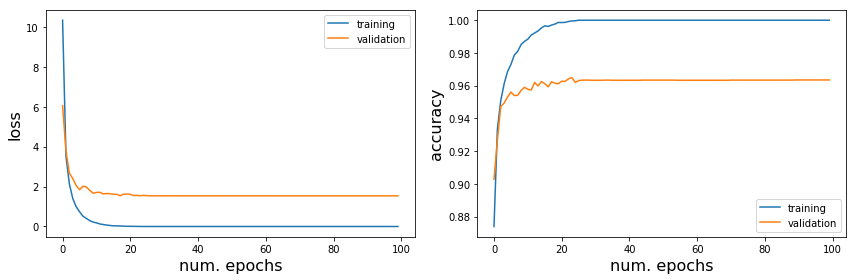

In [28]:
# plot loss and accuracy, and save the figure
x_list = np.arange(1, n_epochs+1)
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(train_loss_list, label='training')
plt.plot(val_loss_list, label='validation')
plt.ylabel('loss', fontsize=16)
plt.xlabel('num. epochs', fontsize=16)
plt.legend()

plt.subplot(122)
plt.plot(train_acc_list, label='training')
plt.plot(val_acc_list, label='validation')
plt.ylabel('accuracy', fontsize=16)
plt.xlabel('num. epochs', fontsize=16)
plt.legend()

plt.tight_layout()
plt.savefig('mnist_nn.png')
plt.show()

## LeNet-5

Note that with a feed-forward neural network mentioned as an example above (2-layer NN, 800 HU, Cross-Entropy Loss), there are 784x800 + 800x10 + 800 + 10 = 636,010 parameters to train. Using Convolutional Neural Network, however, you can attain lower error rate using significantly less number of parameters. 

![LeNet](https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg)

[LeNet-5: Original image contained in the publication. The architecture consists of two sets of convolutional, activation, and pooling layers, followed by a fully-connected layer, activation, another fully-connected, and finally a softmax classifier ([Image Source](https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg))]


LeNet-5 is a 7-level Convolutional Neural Network first introduced in LeCun et al., 1998 with the following configuration:

![LeNet-5 Architecture](https://engmrk.com/wp-content/uploads/2018/09/LeNEt_Summary_Table.jpg)

Note that our input dimension is 28x28 while the input dimension of LeNet-5 is 32x32. One way to work around this is to zero-pad the input to make its dimension 32x32. 

While you are not required to implement any part of this network, we will ask you to compute the number of parameters in certain layers later in the assignment. For practice, you could compute the total number of trainable parameters in LeNet-5 and compare it to the number of parameters required for the network discussed above (2-layer NN, 800 HU, Cross-Entropy Loss).
